<a href="https://colab.research.google.com/github/JacobGordon1800/ATLAS-Heavy-Higgs/blob/main/ATLAS_Data_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
!pip install atlasify     # CERN ATLAS plotting library
!pip install deap update_checker tqdm stopit xgboost        
!pip install dask[delayed] dask[dataframe] dask-ml fsspec>=0.3.3 distributed>=2.10.0   
!pip install scikit-mdr skrebate     
!pip install tpot    
from io import BytesIO                        # Handles import binary data, to support the npy file import
import atlasify
import numpy as np
import matplotlib.pyplot as plt
import requests
import json                                   # JavaScript Object Notation library to handle parsing JSON files
import urllib                                 # Access to HTTP URL parse from web servers
from atlasify import atlasify
from atlasify import monkeypatch_axis_labels
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from tpot.export_utils import set_param_recursive
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
from sklearn import svm
import math
import pandas as pd
from pathlib import Path
import sys
import os
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import keras
from tpot import TPOTClassifier

     |████████████████████████████████| 413 kB 4.9 MB/s 
  Created wheel for atlasify: filename=atlasify-0.7.1-py3-none-any.whl size=411440 sha256=1207a7b7363e416446fdf2e153f56a889e80a3b242796368064451e2db44bb07
  Stored in directory: /root/.cache/pip/wheels/f8/f7/b3/88f1564473f741300cb08b9eda1a3660f59f30ee0b114634d2
Successfully built atlasify
     |████████████████████████████████| 160 kB 5.2 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=6700d69be1cf399a63850e654a67e8b6dde65c420a38370558545f0066fceee6
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
  Created wheel for scikit-mdr: filen

In [ ]:
#  Gets a handle, r, to a HTTP request to the npy data file
r = requests.get('https://hep.ph.liv.ac.uk/~rompotis/MasterStudentProject/AZH/llttbar_data_v2.npy', stream = True)  #Import the large data set
data = np.load(BytesIO(r.raw.read())) #Converts the binary file to a NumPy format

data.shape

(613264, 58)

In [ ]:
keys = json.loads(urllib.request.urlopen("https://hep.ph.liv.ac.uk/~rompotis/MasterStudentProject/AZH/file_llttbar_keys_v2.json").read()) #Import list of varibles


which = json.loads(urllib.request.urlopen("https://hep.ph.liv.ac.uk/~rompotis/MasterStudentProject/AZH/file_llttbar_list_v2.json").read()) #Import list if numbers corresponding to varibles

In [ ]:
print(keys)

['isTagJ1', 'isTagJ2', 'isTagJ3', 'isTagJ4', 'OSSF', 'NTags', 'NTaus', 'Njets', 'labelJ1', 'labelJ2', 'labelJ3', 'labelJ4', 'nLepton', 'NSigJets', 'typeLep1', 'typeLep2', 'typeLep3', 'RunNumber', 'NForwardJets', 'NTauLikeJets', 'MCChannelNumber', 'EventNumber', 'mH', 'mZ', 'MET', 'mJ1', 'mJ2', 'mJ3', 'mJ4', 'mVH', 'pTH', 'pTZ', 'etaH', 'pTJ1', 'pTJ2', 'pTJ3', 'pTJ4', 'pTVH', 'phiH', 'etaJ1', 'etaJ2', 'etaJ3', 'etaJ4', 'etaVH', 'mLep1', 'mLep2', 'mLep3', 'mWHad', 'mWLep', 'mZ_nu', 'phiJ1', 'phiJ2', 'phiJ3', 'phiJ4', 'phiVH', 'METSig', 'mVH_nu', 'pTLep1', 'pTLep2', 'pTLep3', 'pTWHad', 'pTWLep', 'pTZ_nu', 'phiMET', 'dM_VH_H', 'etaLep1', 'etaLep2', 'etaLep3', 'pTVH_nu', 'phiLep1', 'phiLep2', 'phiLep3', 'etaVH_nu', 'mWLep_nu', 'phiVH_nu', 'topHad_m', 'topLep_m', 'bTagBinJ1', 'bTagBinJ2', 'bTagBinJ3', 'bTagBinJ4', 'pTWLep_nu', 'chargeLep1', 'chargeLep2', 'chargeLep3', 'EventWeight', 'MCEventWeight']


In [ ]:
print(which)

[20, 17, 21, 85, 5, 13, 18, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 47, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73, 75, 76, 14, 15, 16, 4]


In [ ]:
sample_slice = data[:,0] # Takes the first collum in the matrix data and extracts every row.
event_slice = data[:,1]  # Same as above excpt 2nd collum (Signal number)
event_number= data[:,2]  # 3rd collum (event number)
signalNumber = 506698 # Sample number (506698)

data_sig = data[ sample_slice == signalNumber ] #Filter data for specific signal number  

data_bkg = data[ (sample_slice == 1) | (sample_slice == 2) ] #Filter out for background data where signal number == 1 or 2

#To get a variable:
j = which[5]
print('my variable is', keys[j])
dat_var_bkg_ = data_bkg[:,5] #This is the 5th collum in the varible which. Which corrsponds to 13, This is the 13th collum in keys. Which is the varible name NsigJets.
dat_var_sig_ = data_sig[:,5] # Collum 5 is NsigJets in the keys varible

my variable is NSigJets


In [ ]:
data_sig.shape

(16616, 58)

In [ ]:
event_number.shape

(613264,)

In [ ]:
tag = 'BDT_v00'
label = 'mZ: 80-100 GeV, 4 jets' #Lables for each varible in signal numbers
v_mva = ['dM_VH_H', 'etaH', 
         'etaJ1', 'etaJ2', 'etaJ3', 'etaJ4',
         'etaLep1', 'etaLep2', 'etaLep3',
         'MET', 'METSig', 'mH', 
         'mVH', 'mWLep', 
         'pTH', 'pTJ1', 'pTJ2',  'pTJ3', 'pTJ4',
         'pTLep1', 'pTLep2', 'pTLep3', 'pTVH',
         'pTWHad', 'pTWLep',
         'pTZ' , 'topHad_m', 
         'topLep_m'   ]

In [ ]:
#Name of signals and there corresponding numbers
samples = {364161: 'Wbb', 364139: 'Zbl', 364164: 'Wbl', 364182: 'Wbl', 364167: 'Wbb', 364168: 'Wl', 364169: 'Wbl', 364183: 'Wl', 364172: 'Wbb', 364302: 'ggZZ', 364175: 'Wl', 364178: 'Wbl', 410644: 'stops', 410645: 'stops', 410646: 'stopWt', 410647: 'stopWt', 364122: 'Zbb', 364101: 'Zcc', 364192: 'Wbl', 410658: 'stopt',410659: 'stopt',   364195: 'Wbl', 364102: 'Zbl', 363356: 'ZZ', 410155: 'ttV', 364125: 'Zbl', 364104: 'Zcl', 363489: 'WZ', 363358: 'WZ', 364105: 'Zbc', 364103: 'Zl', 506683: 'AZH_lltt_mA500_mH400', 506684: 'AZH_lltt_mA600_mH400', 506685: 'AZH_lltt_mA600_mH500', 506686: 'AZH_lltt_mA700_mH400', 506687: 'AZH_lltt_mA700_mH500', 506688: 'AZH_lltt_mA800_mH400', 506689: 'AZH_lltt_mA800_mH600', 506690: 'AZH_lltt_mA900_mH400', 506691: 'AZH_lltt_mA900_mH600', 506692: 'AZH_lltt_mA1000_mH400', 506693: 'AZH_lltt_mA1000_mH600', 506694: 'AZH_lltt_mA1100_mH400', 506695: 'AZH_lltt_mA1100_mH600', 506696: 'AZH_lltt_mA1200_mH400', 506697: 'AZH_lltt_mA1200_mH500', 506698: 'AZH_lltt_mA1200_mH600', 364107: 'Zl', 364108: 'Zbl', 364110: 'Zl', 364111: 'Zbl', 364112: 'Zbc', 364116: 'Zbb', 364117: 'Zl', 364118: 'Zl', 364119: 'Zbb', 364121: 'Zcc', 364250: 'llll', 364124: 'Zcc', 364253: 'lllv', 364254: 'llvv', 410081: 'ttbarWW', 364130: 'Zbb', 364133: 'Zbl', 410470: 'ttbar', 346344: 'ttH', 410218: 'ttV', 410219: 'ttV',410220: 'ttV', 364140: 'Zcc', 364136: 'Zbb', 364126: 'Zbl', 364181: 'Wbb', 364141:'Zvv',364113:'Ztautau',364127:'Zee', 364197:'Wtaunu'}

In [ ]:
len(samples)

77

In [ ]:
extralabel = samples[signalNumber] #Labels the signal number on the plots
extralabel

'AZH_lltt_mA1200_mH600'

In [ ]:
# This is the cut function that extracts the variables for a series of Signal Numbers containsed in the samples list (see above)

sample_slice_2 = [] #Sets an empty array

kept = []

for counter, ji in enumerate(sample_slice):  # Loop through every Signal Number
    j = int(ji) #Converts into an intiger
    #print(j, event_slice[counter] )

    if j == int(event_slice[counter]): # if the signal = value of event_slice
        res = 0 #Ignorers data not relevent to our signal number
    elif j in samples:
        tagi = samples[j] # get the name of Signal Number (text)
        res = 2
        if 'AZH' in tagi: # if the name of Signal Number beings with AZH then
            res = j       # set the valuye to append the new matrix with the Signal Number
        elif tagi == 'ttV': # If the variable beings with ttV (Background Data), then set res = 1
            res = 1          # 2 and 1 are background data 
    else:
        kept.append(j)
    
    sample_slice_2.append(res)   # adds the signal number and associated varivbles and background noise
    

print( list(set(kept)) )
sample_slice_2 = np.array(sample_slice_2)

[410408, 345057, 345055]


In [ ]:
sample_slice_2.shape

(613264,)

In [ ]:
data[:,0] = sample_slice_2
data[:,2] = (event_number % 2)
data.shape

(613264, 58)

In [ ]:
doMZcut = True
if doMZcut:
    # find variable MZ
    mz_position = -1
    mj3_position = -1
    mj4_position = -1
    for counter, j in enumerate(which):
        if keys[j] == 'mZ':
            mz_position = counter
        if keys[j] == 'mJ3':
            mj3_position = counter
        if keys[j] == 'mJ4':
            mj4_position = counter


    print('mZ found at: ',mz_position)
    data = data[ (data[:,mz_position] >=80.) & (data[:,mz_position] <=100.)  &  (data[:,mj3_position] >0.) & (data[:,mj4_position] >0.) ]

mZ found at:  8


In [ ]:
data_sig = data[ data[:,0] == signalNumber ]
data_ttv = data[ data[:,0] == 1 ]
data_oth = data[ data[:,0] == 2 ]
data_bkg = data[ (data[:,0] == 1) | (data[:,0] == 2) ]

In [ ]:
print('Nsig: ', len(data_sig), 'Nbkg', len(data_bkg))
print('ttV', len(data_ttv), 'other:', len(data_oth))

Nsig:  16616 Nbkg 385804
ttV 354409 other: 31395


In [ ]:
def makePlot3(hsig, htop, hrest, bins, label, xtitle, pname, extralabel ):
    monkeypatch_axis_labels()

    plt.clf()
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot()
    # Drawing shapes

    plt.hist(bins[:-1], bins=bins, weights=htop, 
             label="ttV", histtype='stepfilled', color='tab:blue')

    plt.hist(bins[:-1], bins=bins, weights=hrest, bottom=htop,
             label="other", histtype='stepfilled', color='tab:olive')



    # hsig to be normalized to the sum of backgrounds
    total = sum(htop)+sum(hrest)
    hsig = hsig * total / sum(hsig)

    plt.hist(bins[:-1], bins=bins, weights=hsig, # bottom=Z_counts,
             label="Signal", histtype='step', color='tab:orange')
    
    plt.xlabel(xtitle, ha='right', x=0.95, size=16)
    plt.ylabel("Events", ha='right', y=0.95, size=16)
    plt.xlim((bins[0], bins[-1]))
    atlasify(" Internal", r"$\sqrt{s} = 13\,\mathrm{TeV}$ "+label)
    plt.text(0.05, 0.75, extralabel, fontsize=14,transform=ax.transAxes)
    plt.tight_layout()
    plt.savefig(pname+extralabel+".png")
    plt.close()

In [ ]:
!mkdir /content/plots

mkdir: cannot create directory ‘/content/plots’: File exists


In [ ]:
doPlots = True
folder = '/content/plots/'
dft = pd.DataFrame()
if doPlots:
    for counter,j in enumerate(which[4:]):   # loop through the list of varibales start at position 4 (ignore Tags)
        tagi = keys[j] # Name of varible

    #    print(tagi)
        #continue

        dat_bkg_ = data_bkg[:,4+counter]    # Filtering out all the background data for signals and varibles 
        dat_sig_ = data_sig[:,4+counter]

        dat_ttv_ = data_ttv[:,4+counter]
        dat_oth_ = data_oth[:,4+counter]

        # get the min and max values to calibrate the plot axes
        the_min = np.amin(dat_bkg_)
        the_min = min(np.amin(dat_sig_), the_min)

        the_max = np.amax(dat_bkg_)
        the_max = max(np.amax(dat_sig_), the_max)

        # clip the plot axis dependent on values being small
        nbkg = len(dat_bkg_)
        for k in [0.5, 0.4, 0.3, 0.2, 0.1]:
            if len(dat_bkg_[dat_bkg_[:] < the_max*k  ] )/nbkg > 0.95:
                #print( 'will shorten plot',tag,'to', the_max,'x',k)
                the_max = the_max*k
        the_max_sig = max(np.amax(dat_sig_), the_max)
        for k in [0.5, 0.4, 0.3, 0.2, 0.1]:
            if len(dat_sig_[dat_sig_[:] < the_max_sig*k  ] )/nbkg > 0.95:
                the_max_sig = the_max_sig*k
        the_max = max(the_max, the_max_sig)

        if the_min > the_max or (the_min != the_min) or (the_max != the_max):
            print( 'fail plot', tagi, ': ', the_min, the_max)
            continue
        #bins = np.linspace(0, 200, 50)
        bins = np.linspace(the_min, the_max, 50)

        hbkg, hbkg_edge = np.histogram(dat_bkg_, bins=bins, weights=data_bkg[:,3], density=True  )
        hsig, hsig_edge = np.histogram(dat_sig_, bins=bins, weights=data_sig[:,3], density=True  )

        httv, _ = np.histogram(dat_ttv_, bins=bins, weights=data_ttv[:,3], density=False  )
        hoth, _ = np.histogram(dat_oth_, bins=bins, weights=data_oth[:,3], density=False  )

        n = hsig.mean()+hbkg.mean() #Total number of mean events
        b = hbkg.mean() #Mean of background events
        Z = math.sqrt(2 * (n * math.log(n / b) - (n -b))) #Significence equation
        if n < b:
          Z = -Z
        
        dz_dn = math.log(n/b) / math.sqrt(2) * math.sqrt(n*math.log(n/b) - n+b)
        dz_db = -(n+b) / math.sqrt(2) * b * math.sqrt(n*math.log(n/b) - n+b)
        Zq = math.sqrt( dz_dn**2 + dz_db**2)
        
        df = pd.DataFrame({"Varible Name": [tagi],
                           "Significence (linear)": [Z],
                           "Significence (quadratic)": [Zq]})

        dft = pd.concat([dft,df])
                              
              
        #makePlot(hsig, hbkg, bins, label, tagi, folder+'plot_'+ tagi, extralabel)
        makePlot3(hsig, httv, hoth, bins, '', tagi, folder+'plot_'+ tagi, extralabel)

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically

<Figure size 432x288 with 0 Axes>

In [ ]:
print(dft)

   Varible Name  Significence (linear)  Significence (quadratic)
0         NTags                    NaN                       NaN
0      NSigJets               0.253737                  0.087978
0  NForwardJets               0.393087                  0.138260
0            mH               0.014306                  0.004958
0            mZ               0.196550                  0.068123
0           MET               0.023836                  0.008261
0           mJ1               0.061881                  0.021446
0           mJ2               0.088082                  0.030527
0           mJ3               0.057704                  0.019999
0           mJ4               0.061288                  0.021241
0           mVH               0.013555                  0.004698
0           pTH               0.020578                  0.007132
0           pTZ               0.021302                  0.007383
0          etaH               0.234313                  0.081226
0          pTJ1          

In [ ]:
dft1 = dft.sort_values(by = ['Significence (quadratic)'])
dft1

,Varible Name,Significence (linear),Significence (quadratic)
0,mVH,0.013555,0.004698
0,mH,0.014306,0.004958
0,topHad_m,0.015438,0.005351
0,mWHad,0.016488,0.005714
0,mWLep_nu,0.016900,0.005857
0,dM_VH_H,0.018144,0.006288
0,pTJ3,0.020063,0.006953
0,pTWHad,0.020170,0.006990
0,pTVH,0.020390,0.007067
0,pTH,0.020578,0.007132


In [ ]:
dft2 = dft1.head(10)
dft2

,Varible Name,Significence (linear),Significence (quadratic)
0,mVH,0.013555,0.004698
0,mH,0.014306,0.004958
0,topHad_m,0.015438,0.005351
0,mWHad,0.016488,0.005714
0,mWLep_nu,0.016900,0.005857
0,dM_VH_H,0.018144,0.006288
0,pTJ3,0.020063,0.006953
0,pTWHad,0.020170,0.006990
0,pTVH,0.020390,0.007067
0,pTH,0.020578,0.007132


In [ ]:
!cd /content/plots; zip atlas_project_plots.zip *.png

updating: plot_dM_VH_HAZH_lltt_mA1200_mH600.png (deflated 12%)
updating: plot_etaHAZH_lltt_mA1200_mH600.png (deflated 15%)
updating: plot_etaJ1AZH_lltt_mA1200_mH600.png (deflated 12%)
updating: plot_etaJ2AZH_lltt_mA1200_mH600.png (deflated 12%)
updating: plot_etaJ3AZH_lltt_mA1200_mH600.png (deflated 11%)
updating: plot_etaJ4AZH_lltt_mA1200_mH600.png (deflated 12%)
updating: plot_etaLep1AZH_lltt_mA1200_mH600.png (deflated 11%)
updating: plot_etaLep2AZH_lltt_mA1200_mH600.png (deflated 12%)
updating: plot_etaLep3AZH_lltt_mA1200_mH600.png (deflated 12%)
updating: plot_etaVHAZH_lltt_mA1200_mH600.png (deflated 12%)
updating: plot_METAZH_lltt_mA1200_mH600.png (deflated 15%)
updating: plot_METSigAZH_lltt_mA1200_mH600.png (deflated 15%)
updating: plot_mHAZH_lltt_mA1200_mH600.png (deflated 16%)
updating: plot_mJ1AZH_lltt_mA1200_mH600.png (deflated 15%)
updating: plot_mJ2AZH_lltt_mA1200_mH600.png (deflated 16%)
updating: plot_mJ3AZH_lltt_mA1200_mH600.png (deflated 15%)
updating: plot_mJ4AZH_lltt_

In [ ]:
def correlation_heatmap(corr, v_mva, pname):
    plt.clf()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},
                xticklabels = v_mva, yticklabels=v_mva     )
    ax.set(title=pname)
    plt.savefig(pname+'.png')
    plt.close()

In [ ]:
# prepare dataset

my_mva = [
   'mVH','mH','topHad_m','mWHad','mWLep_nu','dM_VH_H','pTJ3','pTWHad','pTVH','pTH'  
]

var_list = [0,2,3,]
var_keys = ['sample','eventnumber','weight',]  # sample is 0 for no higgs 1 for higgs present
for counter,j in enumerate(which):
    #print(j, keys[j], v_mva)
    if keys[j] in my_mva:   # set as my_mva for machine learning and v_mva for full heat map
        var_list.append(counter)
        var_keys.append(keys[j])
        print('using variable', keys[j], counter)
print('doing MVA with ', len(var_list),'variables', var_list)
data_bkg = data_bkg[:,var_list]
data_sig = data_sig[:,var_list]

data_bkg[:,0] = np.zeros( len(data_bkg)  ) 
data_sig[:,0] = np.ones( len(data_sig)  ) 

data_all = np.concatenate( (data_bkg, data_sig)  )
#np.random.shuffle(data_all)

using variable mH 7
using variable mVH 14
using variable pTH 15
using variable pTJ3 20
using variable pTVH 22
using variable mWHad 29
using variable pTWHad 40
using variable dM_VH_H 44
using variable mWLep_nu 51
using variable topHad_m 52
doing MVA with  13 variables [0, 2, 3, 7, 14, 15, 20, 22, 29, 40, 44, 51, 52]


IndexError: ignored

In [ ]:
data_all = data_all[300000:400000]

X = data_all[:,3:]
y = data_all[:,0]
kfold = data_all[:,1]
w_or = data_all[:,2]

In [ ]:
print('weight 0 : ', sum(w_or==0))
print('weight + : ', sum(w_or>0))
print('weight - : ', sum(w_or<0))
print('Total    : ', len(w_or))
w_or = np.abs(w_or)


# remove elements with zero
X = X[ w_or>0 ]
y = y[ w_or>0 ]
kfold = kfold[ (w_or>0)  ]

w_or = w_or[ w_or>0 ]


# renormalize weights
w = w_or /  np.mean(w_or)

## for debugging purpose save these files
np.save('X.npy',X)
np.save('y.npy',y)
np.save('w.npy',w)
np.save('kfold.npy',kfold)

## correlation matrix
corr = np.corrcoef(X, rowvar=False)
correlation_heatmap(corr, v_mva, '/content/plots/corr_heatmap_'+tag+extralabel)


### split in two the samples for the 2-fold validation
### odd vs even events
X_0, y_0, w_0 = None, None, None
X_1, y_1, w_1 = None, None, None

do2foldCV = False
if do2foldCV:
    X_0 = X[ kfold==0 ]
    y_0 = y[ kfold==0 ]
    w_0 = w[ kfold==0 ]

    X_1 = X[ kfold==1 ]
    y_1 = y[ kfold==1 ]
    w_1 = w[ kfold==1 ]


test_size, train_size = 0.3, 0.7

X_train, X_test, y_train, y_test, w_train, w_test = None, None, None, None, None, None
X_0_train, X_0_test, y_0_train, y_0_test, w_0_train, w_0_test = None, None, None, None, None, None
X_1_train, X_1_test, y_1_train, y_1_test, w_1_train, w_1_test = None, None, None, None, None, None

if do2foldCV:
    X_0_train, X_0_test, y_0_train, y_0_test, w_0_train, w_0_test =  train_test_split(X_0,y_0,w_0,test_size=test_size, train_size= train_size, random_state=42)
    X_1_train, X_1_test, y_1_train, y_1_test, w_1_train, w_1_test =  train_test_split(X_0,y_0,w_0,test_size=test_size, train_size= train_size, random_state=43)
    print('Testing statistics - 2-fold cross validation:')
    print('ODD events')
    print('Statistics: train:  sig:', np.sum(y_0_train))
    print('                    bkg:', len(y_0_train)-np.sum(y_0_train))
    print('Statistics: test:   sig:', np.sum(y_0_test))
    print('                    bkg:', len(y_0_test)-np.sum(y_0_test))
    print('EVEN events')
    print('Statistics: train:  sig:', np.sum(y_1_train))
    print('                    bkg:', len(y_1_train)-np.sum(y_1_train))
    print('Statistics: test:   sig:', np.sum(y_1_test))
    print('                    bkg:', len(y_1_test)-np.sum(y_1_test))

else:
    X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=test_size, train_size= train_size, random_state=42)
    print('Testing statistics:')
    print('Statistics: train:  sig:', np.sum(y_train))
    print('                    bkg:', len(y_train)-np.sum(y_train))

    print('Statistics: test:   sig:', np.sum(y_test))
    print('                    bkg:', len(y_test)-np.sum(y_test))



weight 0 :  0
weight + :  75963
weight - :  24037
Total    :  100000
Testing statistics:
Statistics: train:  sig: 9921.0
                    bkg: 60079.0
Statistics: test:   sig: 4275.0
                    bkg: 25725.0


<Figure size 432x288 with 0 Axes>

[LibSVM][0.8804473814922794, 0.8980767299670696, 0.8979]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

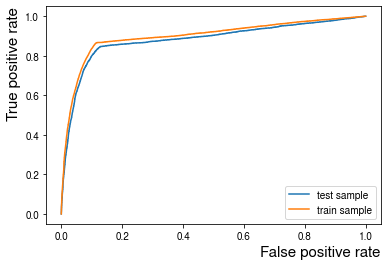

In [ ]:
def makePlot(x_sig, x_bkg, 
             bins, xlabel, ylabel, lab_signal, 
             pname, label=None, doLog=False ):
    plt.clf()
    #plt.rc('font', family='Arial')
    fig, axes = plt.subplots()

    h_main,_,_=plt.hist(x_bkg, bins=bins,label=[lab_signal[1]],
                        density=False, color='aqua')

    hist,_,_ = plt.hist(x_sig, bins=bins,label=[lab_signal[0]], 
                        histtype=u'step', density=False, color='k')
    

    axes.set_xlabel(xlabel, fontsize=15)
    axes.set_ylabel(ylabel, fontsize=15)
    #axes.text(0.03, 0.93, 'ATLAS', fontweight='bold', fontsize=15, fontstyle='italic', transform=axes.transAxes)
    #axes.text(0.2, 0.93, 'Internal', fontsize=15, transform=axes.transAxes)
    if label is not None:
        axes.text(0.03, 0.93, label, fontsize=12, transform=axes.transAxes)
    axes.tick_params(direction='in')
    

    plt.ylim(bottom=0.0, top= max(max(hist),max(h_main))*1.2)
    plt.legend() 
    plt.savefig(pname+".png")
    if doLog:
        plt.yscale('log')
        plt.savefig(pname+"_log.png")




def trainSVM2(x_train, y_train, x_test, y_test, doPlots=False):
    kernel = 'rbf' # 'linear' 'rbf' 'sigmoid'
    model = svm.SVC(kernel=kernel, probability=True,verbose=True)
    model.fit(x_train, y_train)

    # evaluate the output of the discriminant

    prob_train = model.predict_proba(x_train)[:,1]
    prob_test = model.predict_proba(x_test)[:,1]
    #prob_all =  model.predict_proba(x)[:,1]

    prob_train_signal = prob_train[y_train==1]
    prob_train_bkg = prob_train[y_train==0]
    prob_test_signal = prob_test[y_test==1]
    prob_test_bkg = prob_test[y_test==0]

    if doPlots:
        bins = np.linspace(0.,1., 20)
        makePlot(prob_train_signal, prob_train_bkg, bins, 'Cat 1 probability',
                 'Entries',['Cat 1', 'Cat 0'], 'output_svm', 'Train sample')
        makePlot(prob_test_signal, prob_test_bkg, bins, 'Cat 1 probability',
                 'Entries',['Cat 1','Cat 0'],'output_test_svm', 'Test sample')


        # Roc curves:
        fpr, tpr, thresholds = roc_curve(y_test, prob_test)
        fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, prob_train)

        plt.clf()
        fig, axes = plt.subplots()
        plt.plot(fpr, tpr, label='test sample')
        plt.plot(fpr_tr, tpr_tr, label='train sample')
        plt.legend()
    
        axes.set_xlabel('False positive rate', fontsize=15)
        axes.set_ylabel('True positive rate', fontsize=15)
        plt.savefig("roc_curve.png")
    
    auc = roc_auc_score(y_test, prob_test)
    auc_train = roc_auc_score(y_train, prob_train)

    y_pred_test = (prob_test > 0.5)
    
    accu = np.sum(y_test == y_pred_test) / len(y_test) 
    #print(auc, auc_train)

    return [auc, auc_train, accu]


scaler = StandardScaler()
scaler.fit(X_train)
x_train_norm = scaler.transform(X_train)
x_test_norm =  scaler.transform(X_test)

res = trainSVM2(x_train_norm, y_train, x_test_norm, y_test,  True)
print(res)


In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
doFit = True
doPlots = True

##### make plot
def makePlot(X1,X2, tag, Nb, **kwargs):
    plt.clf()
    
    xtitle=tag
    title = tag
    for key, value in kwargs.items():
        if key == "xtitle":
            xtitle = value
        elif key=="title":
            title = value
        

    themin = min( [min(X1), min(X2)])
    themax = max( [max(X1), max(X2)])
    bins = np.linspace(themin, themax, Nb)

    plt.hist(X1, bins=bins, density=True, label=['background'])
    plt.hist(X2, bins=bins, density=True, label=['signal'], histtype=u'step')

    plt.xlabel(xtitle)
    plt.title(title)
    plt.ylabel("# Entries (Norm)")
    plt.legend(loc='upper right')
    plt.savefig(tag+".png")

Epoch 1/150
7000/7000 [==============================] - 17s 2ms/step - loss: 0.2458 - accuracy: 0.8901 - val_loss: 0.2237 - val_accuracy: 0.8985
Epoch 2/150
7000/7000 [==============================] - 16s 2ms/step - loss: 0.2213 - accuracy: 0.9011 - val_loss: 0.2213 - val_accuracy: 0.9015
Epoch 3/150
7000/7000 [==============================] - 16s 2ms/step - loss: 0.2185 - accuracy: 0.9033 - val_loss: 0.2192 - val_accuracy: 0.9022
Epoch 4/150
7000/7000 [==============================] - 15s 2ms/step - loss: 0.2168 - accuracy: 0.9037 - val_loss: 0.2190 - val_accuracy: 0.9018
Epoch 5/150
7000/7000 [==============================] - 15s 2ms/step - loss: 0.2161 - accuracy: 0.9043 - val_loss: 0.2170 - val_accuracy: 0.9026
Epoch 6/150
7000/7000 [==============================] - 14s 2ms/step - loss: 0.2154 - accuracy: 0.9044 - val_loss: 0.2171 - val_accuracy: 0.9030
Epoch 7/150
7000/7000 [==============================] - 14s 2ms/step - loss: 0.2152 - accuracy: 0.9039 - val_loss: 0.2169 -

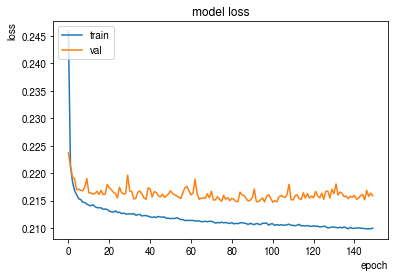

In [ ]:
if doFit:
    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train_norm, y_train, epochs=150, batch_size=10,validation_data=(x_test_norm,y_test))
    print(history.history.keys())
    plt.clf()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig("/content/plots/model_accuracy.png")
    plt.clf()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig("/content/plots/model_loss.png")
    model.save("/content/models/my_model")
else:
    model = keras.models.load_model("/content/models/my_model")

In [ ]:
_, accuracy = model.evaluate(X, y)

3125/3125 [==============================] - 9s 3ms/step - loss: 29.5226 - accuracy: 0.7273


In [ ]:
print('Accuracy: %.2f' % (accuracy*100))
print(' Number of entries: ', len(X))

Accuracy: 72.73
 Number of entries:  100000


In [ ]:
scaler.fit(X)
X_norm = scaler.transform(X)
dataset_norm = np.insert(X_norm,10, y, axis=1)

['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
['f0_norm', 'f1_norm', 'f2_norm', 'f3_norm', 'f4_norm', 'f5_norm', 'f6_norm', 'f7_norm', 'f8_norm', 'f9_norm']
[

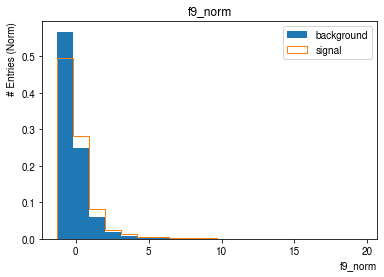

In [ ]:
if doPlots:
    feat = ["f"+str(j)+"_norm" for j in range(10)]
    for k,f in enumerate(feat):
        print(feat)
        x = dataset_norm[:,[k,10]]
        x1 = x[ x[:,1] == 0  ]
        x1 = x1[:,0]
        x2 = x[ x[:,1] >0  ]
        x2 = x2[:,0]
        makePlot(x1,x2,f,20)

[[0.43294066]
 [0.68644655]
 [0.00642818]
 ...
 [0.5539884 ]
 [0.27135187]
 [0.5933848 ]]


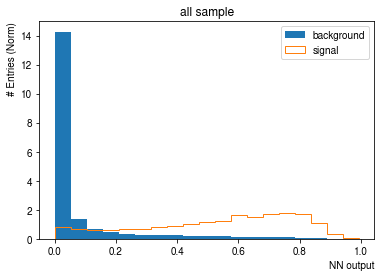

In [ ]:
x_bkg =  dataset_norm[  dataset_norm[:,10] == 0  ][:,0:10] 
x_sig =  dataset_norm[  dataset_norm[:,10] > 0  ][:,0:10] 

## prediction
res_sig = model.predict(x_sig)
res_bkg = model.predict(x_bkg)
print(res_sig)
makePlot(res_bkg.flatten(),res_sig.flatten(), "nn_pred", 20, xtitle="NN output", title="all sample")

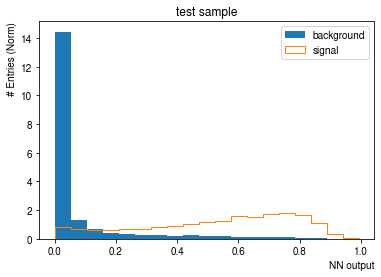

In [ ]:
shape = dataset_norm.shape
N = shape[0]
N_train = int(2*N/3)
data_train = dataset_norm[N_train:,:]
x_bkg = data_train[  data_train[:,10] == 0  ][:,0:10] 
x_sig = data_train[  data_train[:,10] > 0 ][:,0:10]


## prediction
res_sig = model.predict(x_sig)
res_bkg = model.predict(x_bkg)
makePlot(res_bkg.flatten(),res_sig.flatten(), "nn_pred_test", 20, xtitle="NN output", title="test sample")



In [ ]:
_,acc_train = model.evaluate(X_train, y_train)
print('Accuracy train: {:.2f}'.format(acc_train))

score,acc_test = model.evaluate(X_test, y_test)
print('Accuracy test: {:.2f}'.format(acc_test))

2188/2188 [==============================] - 6s 3ms/step - loss: 29.3620 - accuracy: 0.7276
Accuracy train: 0.73
938/938 [==============================] - 2s 2ms/step - loss: 29.8972 - accuracy: 0.7268
Accuracy test: 0.73


0.5019903227456396 0.5053226956110113


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

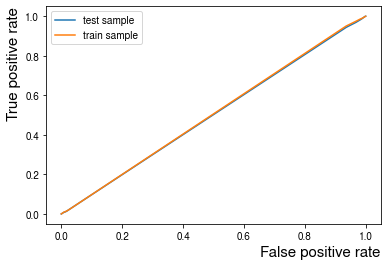

In [ ]:
rfc=RandomForestClassifier(random_state=42)
model = rfc.fit(x_train_norm,y_train)
   
   
   
   
   
   
# evaluate the output of the discriminant

prob_train = model.predict_proba(X_train)[:,1]
prob_test = model.predict_proba(X_test)[:,1]
#prob_all =  model.predict_proba(x)[:,1]

prob_train_signal = prob_train[y_train==1]
prob_train_bkg = prob_train[y_train==0]
prob_test_signal = prob_test[y_test==1]
prob_test_bkg = prob_test[y_test==0]


if doPlots:
  bins = np.linspace(0.,1., 20)
  makePlot(prob_train_signal, prob_train_bkg, bins, 'Cat 1 probability',
            'Entries',['Cat 1', 'Cat 0'], 'output_svm', 'Train sample')
  makePlot(prob_test_signal, prob_test_bkg, bins, 'Cat 1 probability',
            'Entries',['Cat 1','Cat 0'],'output_test_svm', 'Test sample')


# Roc curves:
fpr, tpr, thresholds = roc_curve(y_test, prob_test)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, prob_train)

plt.clf()
fig, axes = plt.subplots()
plt.plot(fpr, tpr, label='test sample')
plt.plot(fpr_tr, tpr_tr, label='train sample')
plt.legend()
    
axes.set_xlabel('False positive rate', fontsize=15)
axes.set_ylabel('True positive rate', fontsize=15)
plt.savefig("roc_curve.png")
    
auc = roc_auc_score(y_test, prob_test)
auc_train = roc_auc_score(y_train, prob_train)

y_pred_test = (prob_test > 0.5)
    
accu = np.sum(y_test == y_pred_test) / len(y_test) 
print(auc, auc_train)

In [ ]:
tpot = TPOTClassifier(generations=3, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('/content/tpot_higgs_pipeline.py')

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9056000000000001

Generation 2 - Current best internal CV score: 0.9056000000000001

Generation 3 - Current best internal CV score: 0.9056000000000001

Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
0.9037


Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)

MinMaxScaler equation

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [ ]:
# Average CV score on the training set was: 0.9056000000000001
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

model = exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9037

0.9336791275240255 0.9781927252760648


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

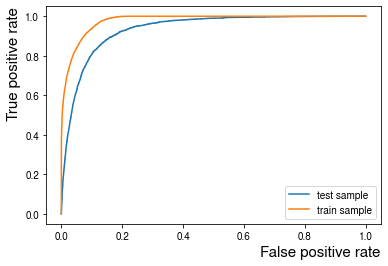

In [ ]:
# evaluate the output of the discriminant

prob_train = model.predict_proba(X_train)[:,1]
prob_test = model.predict_proba(X_test)[:,1]
#prob_all =  model.predict_proba(x)[:,1]

prob_train_signal = prob_train[y_train==1]
prob_train_bkg = prob_train[y_train==0]
prob_test_signal = prob_test[y_test==1]
prob_test_bkg = prob_test[y_test==0]


if doPlots:
  bins = np.linspace(0.,1., 20)
  makePlot(prob_train_signal, prob_train_bkg, bins, 'Cat 1 probability',
            'Entries',['Cat 1', 'Cat 0'], 'output_svm', 'Train sample')
  makePlot(prob_test_signal, prob_test_bkg, bins, 'Cat 1 probability',
            'Entries',['Cat 1','Cat 0'],'output_test_svm', 'Test sample')


# Roc curves:
fpr, tpr, thresholds = roc_curve(y_test, prob_test)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, prob_train)

plt.clf()
fig, axes = plt.subplots()
plt.plot(fpr, tpr, label='test sample')
plt.plot(fpr_tr, tpr_tr, label='train sample')
plt.legend()
    
axes.set_xlabel('False positive rate', fontsize=15)
axes.set_ylabel('True positive rate', fontsize=15)
plt.savefig("roc_curve.png")
    
auc = roc_auc_score(y_test, prob_test)
auc_train = roc_auc_score(y_train, prob_train)

y_pred_test = (prob_test > 0.5)
    
accu = np.sum(y_test == y_pred_test) / len(y_test) 
print(auc, auc_train)